In [ ]:
#imorting the libraries 
import numpy as np
import pandas as pd
import pylab as pl
import statsmodels.api as sm

In [ ]:
#imorting dataset
df=pd.read_csv("binary.csv")

In [ ]:
df.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [ ]:
#RENAME THE RANK COLUMN
df.columns=["admit","gre","gpa","eligible_rank"]
df.head()

,admit,gre,gpa,eligible_rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [ ]:
pd.crosstab(df["admit"],df["eligible_rank"],rownames=["admit"])

eligible_rank,1,2,3,4
admit,,,,
0,28,97,93,55
1,33,54,28,12


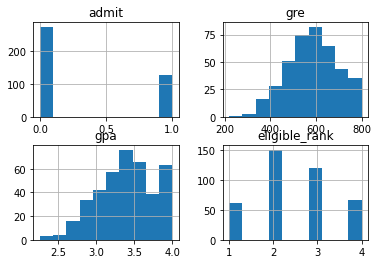

In [ ]:
df.hist()
pl.show()

In [ ]:
dummy_ranks=pd.get_dummies(df["eligible_rank"],prefix="eligible_rank")
dummy_ranks[:5]

,eligible_rank_1,eligible_rank_2,eligible_rank_3,eligible_rank_4
0,0,0,1,0
1,0,0,1,0
2,1,0,0,0
3,0,0,0,1
4,0,0,0,1


In [ ]:
#CREATING A CLEAN DATAFRAME : PREVENTING MULTICOLINEARITY
cls_to_keep=["admit","gre","gpa"]
data=df[cls_to_keep].join(dummy_ranks.loc[:,"eligible_rank_2":])
data.head()

,admit,gre,gpa,eligible_rank_2,eligible_rank_3,eligible_rank_4
0,0,380,3.61,0,1,0
1,1,660,3.67,0,1,0
2,1,800,4.00,0,0,0
3,1,640,3.19,0,0,1
4,0,520,2.93,0,0,1


In [ ]:
#MANUALLY ADDING THE INTERSCEPT
data["intercpt"]=1.0
data.head()

,admit,gre,gpa,eligible_rank_2,eligible_rank_3,eligible_rank_4,intercpt
0,0,380,3.61,0,1,0,1.0
1,1,660,3.67,0,1,0,1.0
2,1,800,4.00,0,0,0,1.0
3,1,640,3.19,0,0,1,1.0
4,0,520,2.93,0,0,1,1.0


In [ ]:
train_cls=data.columns[1:]

logit=sm.Logit(data["admit"],data[train_cls])

In [ ]:
res=logit.fit()

Optimization terminated successfully.
         Current function value: 0.573147
         Iterations 6


In [ ]:
#interpriting the results
mdm=res.predict([800,4.00,0,0,0,1.0])

In [ ]:
print(mdm)

[0.73840825]


In [ ]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  admit   No. Observations:                  400
Model:                          Logit   Df Residuals:                      394
Method:                           MLE   Df Model:                            5
Date:                Mon, 13 Sep 2021   Pseudo R-squ.:                 0.08292
Time:                        18:32:01   Log-Likelihood:                -229.26
converged:                       True   LL-Null:                       -249.99
Covariance Type:            nonrobust   LLR p-value:                 7.578e-08
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
gre                 0.0023      0.001      2.070      0.038       0.000       0.004
gpa                 0.8040      0.332      2.423      0.015       0.154       1.454
eligible_rank_2    -0.6754      0.316     -2.134      0.033      -1.296      -0.055
eligible_rank_3    -1.3402      0.345     -3.881      0.000      -2.017      -0.663
eligible_rank_4    -1.5515      0.418     -3.713      0.000      -2.370      -0.733
intercpt           -3.9900      1.140     -3.500      0.000      -6.224      -1.756
===================================================================================
"""